In [1]:
!pip install dmba

     |████████████████████████████████| 11.8 MB 4.1 MB/s 


In [2]:
import dmba
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

no display found. Using non-interactive Agg backend


In [3]:
df = pd.read_csv('Wine.csv')

In [4]:
df.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
pcs = PCA()

In [6]:
pcs.fit(df.iloc[:, 1:].dropna(axis=0))

PCA()

In [7]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative propotion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,314.9632,13.1353,3.0722,2.2341,1.1085,0.9171,0.5282,0.3891,0.3348,0.2678,0.1938,0.1452,0.0906
Proportion of variance,0.9981,0.0017,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative propotion,0.9981,0.9998,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [8]:
#Q1: PC1 has such a high value, meaning that it appears to represent a very large portion (99.8%) of the data's variation. 
# However, there is a good chance that this perspective is skewed due to the difference in scales/units between the different columns.

In [9]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, index = df.iloc[:, 1:].columns)
pcsComponents_df.iloc[:, :5]

,PC1,PC2,PC3,PC4,PC5
Alcohol,0.001659,0.001203,-0.016874,-0.141447,0.020337
Malic_Acid,-0.000681,0.002155,-0.122003,-0.160390,-0.612883
Ash,0.000195,0.004594,-0.051987,0.009773,0.020176
Ash_Alcalinity,-0.004671,0.026450,-0.938593,0.330965,0.064352
Magnesium,0.017868,0.999344,0.029780,0.005394,-0.006149
Total_Phenols,0.000990,0.000878,0.040485,0.074585,0.315245
Flavanoids,0.001567,-0.000052,0.085443,0.169087,0.524761
Nonflavanoid_Phenols,-0.000123,-0.001354,-0.013511,-0.010806,-0.029648
Proanthocyanins,0.000601,0.005004,0.024659,0.050121,0.251183
Color_Intensity,0.002327,0.015100,-0.291398,-0.878894,0.331747


In [10]:
pcs = PCA(n_components = 2)
pcs.fit(preprocessing.scale(df.iloc[:, 1:].dropna(axis=0)))

PCA(n_components=2)

In [11]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative propotion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2
Standard deviation,2.1754,1.5846
Proportion of variance,0.3620,0.1921
Cumulative propotion,0.3620,0.5541


In [12]:
principalComponents = pcs.fit_transform(df.iloc[:, 1:].dropna(axis=0))

In [13]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [14]:
%matplotlib inline

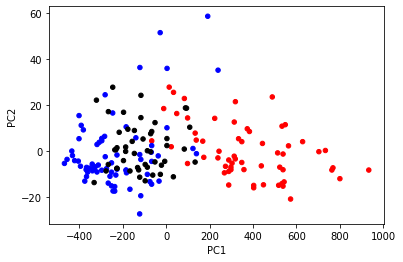

In [15]:
colorMap = {'A': 'red', 'B': 'blue', 'C': 'black'}
principalDf.plot.scatter(x='PC1', y='PC2', c=[colorMap[t] for t in df.Type])


In [16]:
#Q2 The information in PC1 and PC2 does not appear to be identical to the information in Wine Type. 
# However, the color-coded plot shows us that PC1 and PC2 are able to indicate groups somewhat. This information can be used to spot outliers or unusual wines.